# Static Image Processing

## Importing & Displaying Image

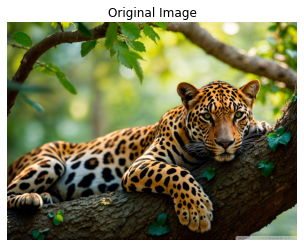

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
img_path = '/home/xilinx/jupyter_notebooks/Image_Processing/SourceImage.jpg'
img = Image.open(img_path).resize((640, 480))  # Resize to HDMI output resolution
img_n = np.array(img)
img_np = cv2.cvtColor(img_n, cv2.COLOR_RGB2BGR)

# Display original image in notebook
plt.imshow(img_n)
plt.title("Original Image")
plt.axis('off')
plt.show()

## Initializing HDMI Output

In [2]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *

# Reload and initialize overlay
base = BaseOverlay("base.bit")
base.download()

# Initialize HDMI out
hdmi_out = base.video.hdmi_out
hdmi_out.configure(VideoMode(640, 480, 24))
hdmi_out.start()

print("HDMI out mode:", hdmi_out.mode)

HDMI out mode: VideoMode: width=640 height=480 bpp=24 fps=60


## Applying Filters & Displaying Images

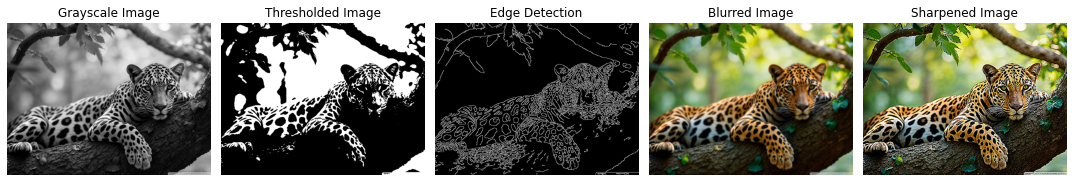

In [3]:
# 1) grayscale
gray = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY)

# 2) Thresholding filter (using binary thresholding)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 3) Apply edge detection on the greyscaled image
edges = cv2.Canny(gray, 100, 200)

# 4) Apply blur on the original image
blurred_np = cv2.GaussianBlur(img_np, (5, 5), 0)

# 5) Apply sharpening on the original image
kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])
sharpened_np = cv2.filter2D(img_np, -1, kernel)

# Convert single-channel images to 3-channel BGR for consistent plotting
thresh_np = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
edges_np = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
gray_np = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

# Display all images using subplot (convert to RGB for display)
plt.figure(figsize=(15, 5))

plt.subplot(151)
plt.imshow(cv2.cvtColor(gray_np, cv2.COLOR_BGR2RGB))
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(152)
plt.imshow(cv2.cvtColor(thresh_np, cv2.COLOR_BGR2RGB))
plt.title("Thresholded Image")
plt.axis('off')

plt.subplot(153)
plt.imshow(cv2.cvtColor(edges_np, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title("Edge Detection")
plt.axis('off')

plt.subplot(154)
plt.imshow(cv2.cvtColor(blurred_np, cv2.COLOR_BGR2RGB))
plt.title("Blurred Image")
plt.axis('off')

plt.subplot(155)
plt.imshow(cv2.cvtColor(sharpened_np, cv2.COLOR_BGR2RGB))
plt.title("Sharpened Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## HDMI Results

In [ ]:
import time

# Interactive loop to switch between filters
while True:
    print("\nSelect filter to display on HDMI:")
    print("1: Grayscale Image")
    print("2: Threshold Image")
    print("3: Blurred Image")
    print("4: Edge Detection")
    print("5: Sharpened Image")
    print("6: Exit")
    
    choice = input("Enter your choice (1-6): ")
    
    if choice == '1':
        filtered_np = gray_np
    elif choice == '2':
        filtered_np = thresh_np
    elif choice == '3':
        filtered_np = blurred_np
    elif choice == '4':
        filtered_np = edges_np
    elif choice == '5':
        filtered_np = sharpened_np
    elif choice == '6':
        print("Exiting...")
        break
    else:
        print("Invalid choice, please try again.")
        continue
    
    # Write filtered frame in BGR
    frame = hdmi_out.newframe()
    if frame.shape == filtered_np.shape and frame.dtype == filtered_np.dtype:
        np.copyto(frame, filtered_np)
        hdmi_out.writeframe(frame)
        time.sleep(1)  # Allow time for buffer update
        print("Filtered frame written successfully")
    else:
        print("Shape or dtype mismatch:", frame.shape, filtered_np.shape, frame.dtype, filtered_np.dtype)


Select filter to display on HDMI:
1: Grayscale Image
2: Threshold Image
3: Blurred Image
4: Edge Detection
5: Sharpened Image
6: Exit
Enter your choice (1-6): 1
Filtered frame written successfully

Select filter to display on HDMI:
1: Grayscale Image
2: Threshold Image
3: Blurred Image
4: Edge Detection
5: Sharpened Image
6: Exit
